## Bike Sharing Linear Regression.

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
	- Which variables are significant in predicting the demand for shared bikes.
	- How well those variables describe the bike demands
    
#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## 1. Reading and Understanding the Data

Let us first import required libraries and read the housing dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Below packages will be used to read, understand and manipulate the given data.
import numpy as np
import pandas as pd

# Below packages will be used for visualization and analyze the data.
import matplotlib.pyplot as plt
import seaborn as sns

# Following packages will be used in Regression and build model.
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Following package will be used in ViF analysis. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Below package will be used to check R2 of model.
from sklearn.metrics import r2_score


In [2]:
#Reading the data
df_bike_share = pd.read_csv('day.csv')

In [3]:
# Checking the head of the dataset
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the bike sharing data

In [4]:
df_bike_share.shape

(730, 16)

- <b>In dataframe we have 730 rows(data based on days) and 16 columns (attributes/variables describing each day data)</b>

In [5]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- <b>We can notice that there are no missing value.<b>
- <b>Also we have int and float datatypes majorly except one column dteday which has date.<b>

In [6]:
# summary of all numeric cols
df_bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data Cleaning and Analysis.

<b>2.1 Converting to proper categorical string.</b>

We can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case.

Also same can be observed in  'yr', 'mnth', 'holiday', 'weekday', 'workingday' variables.
Just converting those into categorical string values before proceeding with model building. Also it helps in better labelling during visualization.

Taking categorical strings from Data Dictionary
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12) <i><font color='green'>(We will use category values as Jan to Dec for values 1 to 12 respectively to represent it.)</font></i>
- holiday : weather day is a holiday or not  <i><font color='green'>(We will use Yes or No to represent this category)</font></i>
- weekday : day of the week  <i><font color='green'>(We will use category values as Sunday to Saturday for values 0 to 6 respectively to represent it.)</font></i>
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.  <i><font color='green'>(We will use Yes or No to represent this category)</font></i>
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy <i><font color='green'>(We will use Clear/Cloud to represent this category)</font></i>
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <i><font color='green'>(We will use Mist+Cloud to represent this category)</font></i>
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <i><font color='green'>(We will use Light Rain/Snow to represent this category)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <i><font color='green'>(We will use Heavy Rain/Snow to represent this category)</font></i>
    


In [7]:
#Having different maps based on data dictionary
season_dict = {1:'spring',2:'summer',3:'fall',4:'winter'}
yr_dict = {0:'2018', 1:'2019'}
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 
              4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 
              10:'Oct', 11:'Nov', 12:'Dec'}
holiday_dict = {0:'No', 1:'Yes'}
weekday_dict = {0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 
                4:'Thursday', 5:'Friday', 6:'Saturday', 
                }
workingday_dict = {0:'No', 1:'Yes'}


weathersit_dict = {1:'Clear/Cloud ', 
                   2:'Mist+Cloud',
                   3:'Light Rain/Snow',
                   4:'Heavy Rain/Snow'}

In [8]:
def convert_to_categorical_str(col_name,col_map):
    
    print("Checking value count before conversion of ", col_name)
    print(df_bike_share[col_name].value_counts())
    
    df_bike_share[col_name] = df_bike_share[col_name].map(col_map)
    print()
    
    print("Checking value count after conversion", col_name)
    print(df_bike_share[col_name].value_counts())

In [9]:
# converting season
convert_to_categorical_str('season',season_dict)

Checking value count before conversion of  season
3    188
2    184
1    180
4    178
Name: season, dtype: int64

Checking value count after conversion season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [10]:
# converting year
convert_to_categorical_str('yr',yr_dict)

Checking value count before conversion of  yr
0    365
1    365
Name: yr, dtype: int64

Checking value count after conversion yr
2018    365
2019    365
Name: yr, dtype: int64


In [11]:
# converting month
convert_to_categorical_str('mnth',month_dict)

Checking value count before conversion of  mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

Checking value count after conversion mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64


In [12]:
# converting holiday
convert_to_categorical_str('holiday',holiday_dict)

Checking value count before conversion of  holiday
0    709
1     21
Name: holiday, dtype: int64

Checking value count after conversion holiday
No     709
Yes     21
Name: holiday, dtype: int64


In [13]:
# converting weekday
convert_to_categorical_str('weekday',weekday_dict)

Checking value count before conversion of  weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

Checking value count after conversion weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64


In [14]:
# converting workingday
convert_to_categorical_str('workingday',workingday_dict)

Checking value count before conversion of  workingday
1    504
0    226
Name: workingday, dtype: int64

Checking value count after conversion workingday
Yes    504
No     226
Name: workingday, dtype: int64


In [15]:
# converting weathersit
convert_to_categorical_str('weathersit',weathersit_dict)

Checking value count before conversion of  weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

Checking value count after conversion weathersit
Clear/Cloud        463
Mist+Cloud         246
Light Rain/Snow     21
Name: weathersit, dtype: int64


In [16]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [17]:
#Checking the data post conversion.
df_bike_share.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,Monday,Yes,Mist+Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Tuesday,Yes,Mist+Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,Wednesday,Yes,Clear/Cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,Thursday,Yes,Clear/Cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,Friday,Yes,Clear/Cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,2018,Jan,No,Saturday,No,Clear/Cloud,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,2018,Jan,No,Sunday,No,Mist+Cloud,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,2018,Jan,No,Monday,Yes,Mist+Cloud,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,2018,Jan,No,Tuesday,Yes,Clear/Cloud,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,2018,Jan,No,Wednesday,Yes,Clear/Cloud,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [18]:
print('Count of unique values in instant:',len(df_bike_share['instant'].unique()))
print('Count of unique values in dteday:',len(df_bike_share['dteday'].unique()))

Count of unique values in instant: 730
Count of unique values in dteday: 730


<b> Now post converstion if we have a brief look at data then we observe that,<br>- 'instant' is used as record index which is unique so no use in Visualization or Modelling.<br>- 'dteday' is date which also unique. We already have month and year column to represent same.</b><br>
<font color='green'>So we can drop 'instant' and 'dteday'</font>

<b>2.2 Droping unneccessary columns</b>

In [19]:
# Dropping instant column
df_bike_share.drop('instant',axis=1,inplace=True) 

# Dropping dteday column
df_bike_share.drop('dteday',axis=1,inplace=True) 

In [20]:
df_bike_share.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist+Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist+Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear/Cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear/Cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear/Cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,2018,Jan,No,Saturday,No,Clear/Cloud,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,2018,Jan,No,Sunday,No,Mist+Cloud,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,2018,Jan,No,Monday,Yes,Mist+Cloud,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,2018,Jan,No,Tuesday,Yes,Clear/Cloud,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,2018,Jan,No,Wednesday,Yes,Clear/Cloud,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [21]:
# summary or descriptive analysis of remaining proper numeric cols
df_bike_share.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3. Visualising the Data / EDA(Exploratory Data Analysis).
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

<b>3.1 Distribution of Target variable</b>

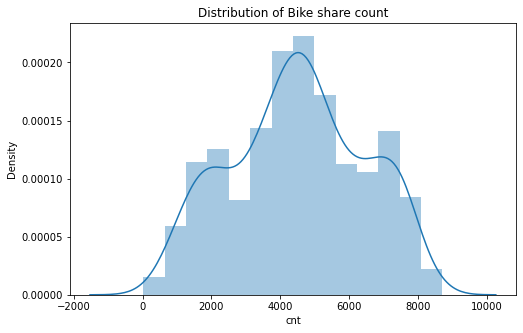

In [22]:
# Visualising the target variable 'cnt'
plt.figure(figsize=(8,5))

# Distribution plot of bike rental count
sns.distplot(df_bike_share['cnt'])
plt.title('Distribution of Bike share count')

plt.show()

<font color='green'><b><u>Observation:</u></b><br>- We have more bike share cnt between 4000-6000 times. As we can clearly see peak is at approx 4500 times.<br>- On a given day the minimum bike shared is close to 0 and maximum bike shared is close to 8500 times. This was clear in previous descriptive analysis as well.</font>

<b>3.2 Univariate analysis of numerical continuous variable</b>

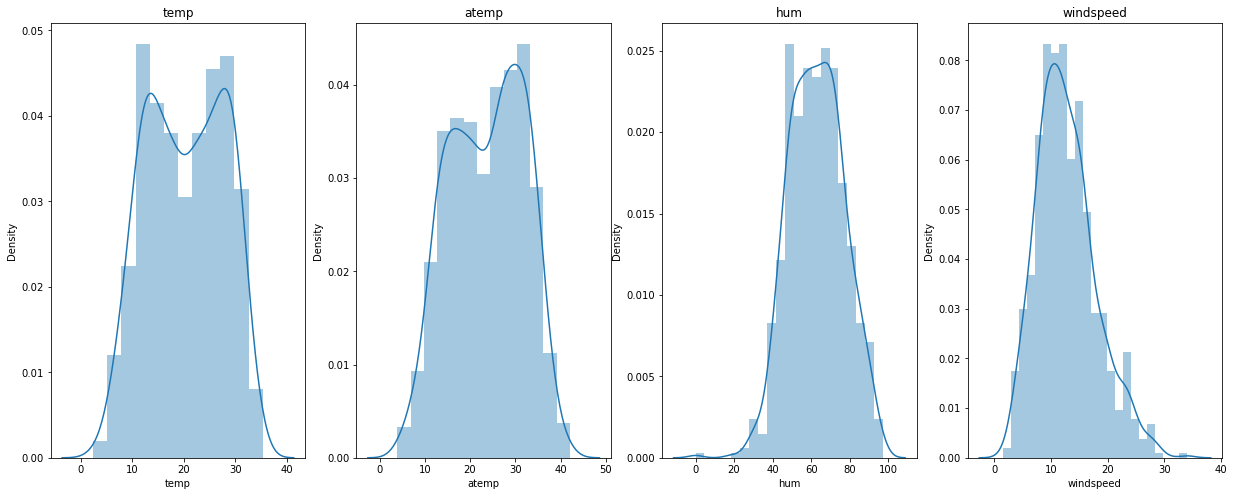

In [23]:
#Using distplot for analysis
plt.figure(figsize=(21, 8))

plt.subplot(1,4,1)
ax1 = sns.distplot(df_bike_share['temp'])
plt.title('temp',fontsize=12)

plt.subplot(1,4,2)
ax2 = sns.distplot(df_bike_share['atemp'])
plt.title('atemp',fontsize=12)

plt.subplot(1,4,3)
ax3 = sns.distplot(df_bike_share['hum'])
plt.title('hum',fontsize=12)

plt.subplot(1,4,4)
ax4 = sns.distplot(df_bike_share['windspeed'])
plt.title('windspeed',fontsize=12)

plt.show()

<font color='green'><b><u>Observation:</u></b><br>- We have 2 peaks in temp whereas atemp has highest peak between 30-35.<br>- In hum we have more density in range of 50-85. Whereas for windspeed range is 10-15</font>

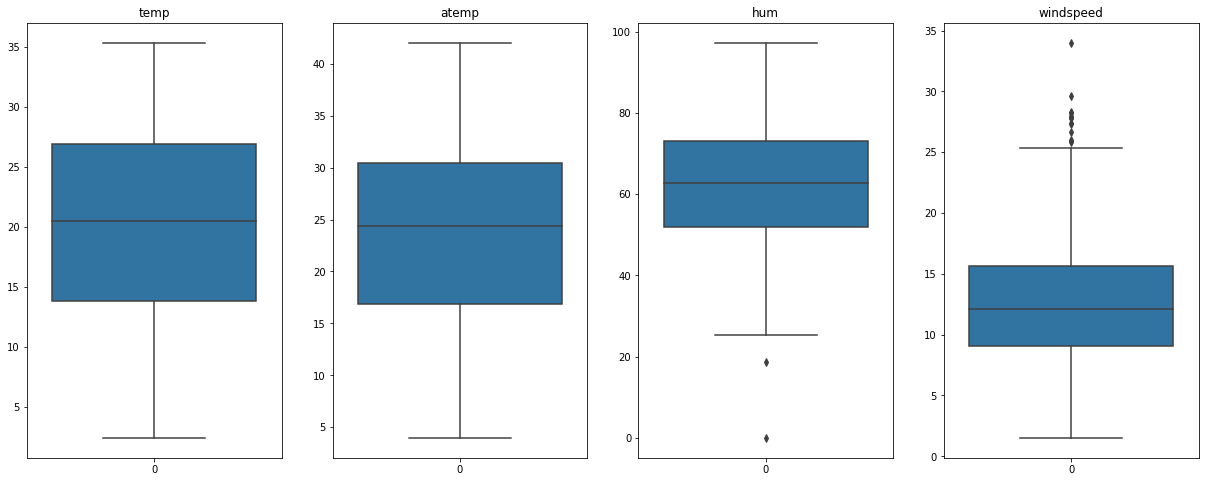

In [24]:
#Using Boxplot for analysis
plt.figure(figsize=(21, 8))

plt.subplot(1,4,1)
ax1 = sns.boxplot(data=df_bike_share['temp'])
plt.title('temp',fontsize=12)

plt.subplot(1,4,2)
ax2 = sns.boxplot(data=df_bike_share['atemp'])
plt.title('atemp',fontsize=12)

plt.subplot(1,4,3)
ax3 = sns.boxplot(data=df_bike_share['hum'])
plt.title('hum',fontsize=12)

plt.subplot(1,4,4)
ax4 = sns.boxplot(data=df_bike_share['windspeed'])
plt.title('windspeed',fontsize=12)

plt.show()

<font color='green'><b><u>Observation:</u></b><br>- We can notice that atemp is slightly more than temp between in terms of median, minimum or maximum value.<br>- We have few outliers in hum below lower fence and, also outliers is present in windspeed above upper fence of Interquartile Range.</font>

<b>3.3 Bivariate analysis of numerical variable</b>

<Figure size 1080x648 with 0 Axes>

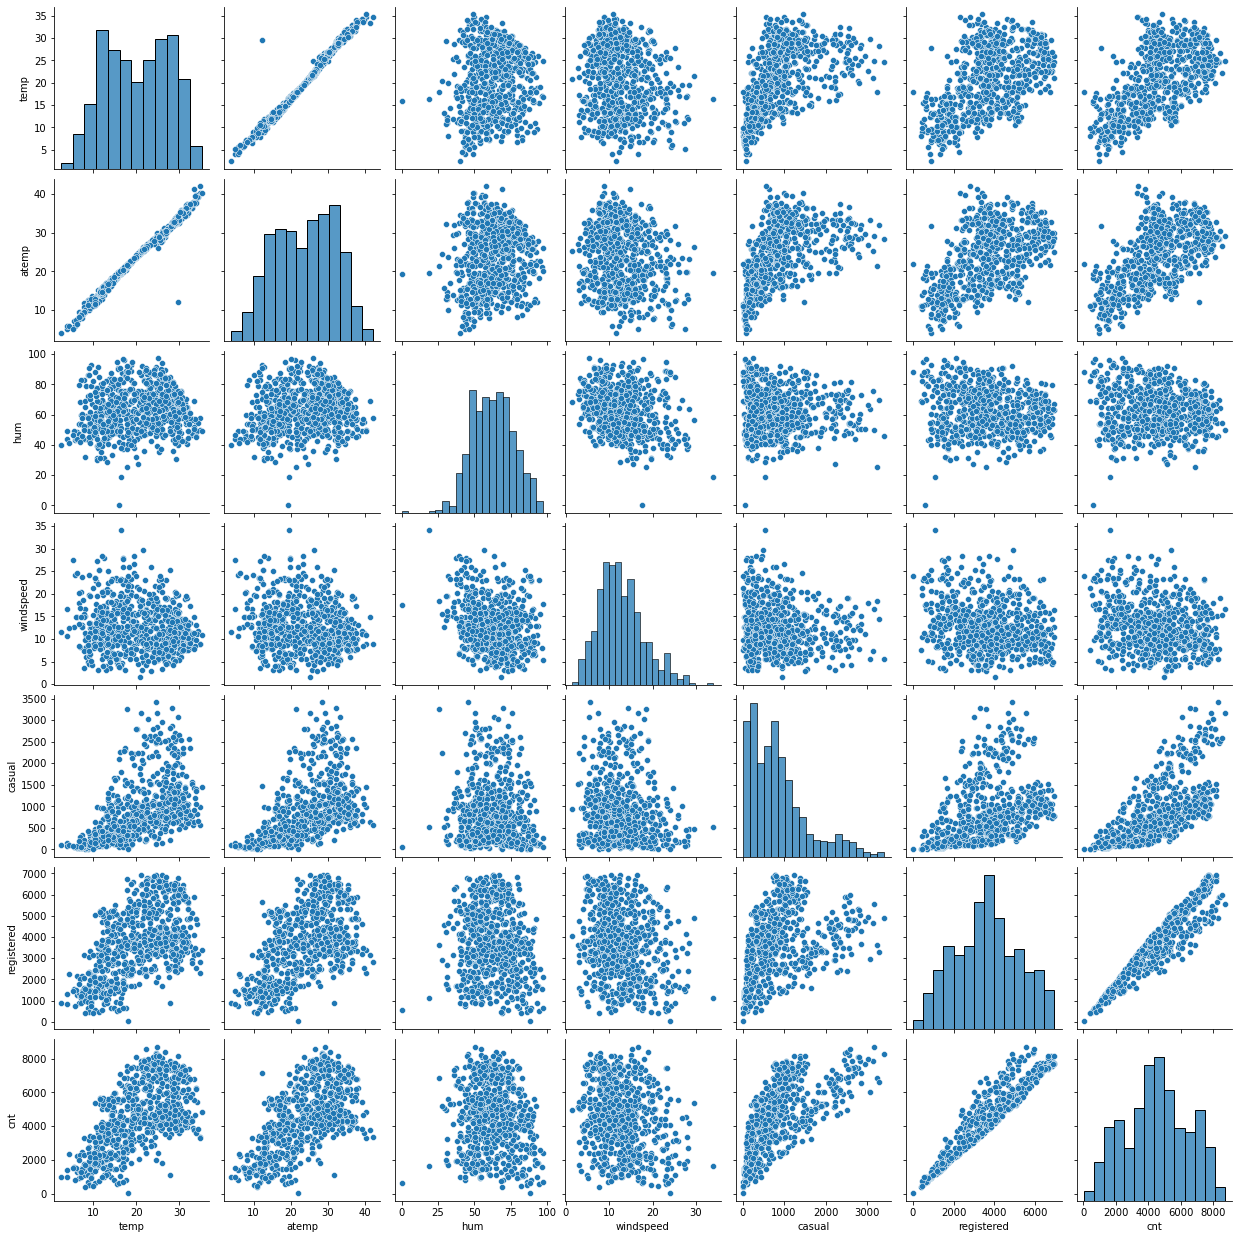

In [25]:
#Here instead of using scatter plot of each variable against price, we will use pairplot

#Extracting numerical columns names.
numerical_col = df_bike_share.select_dtypes(exclude=['object']).columns


#plotting pair plot
plt.figure(figsize=[15,9])
sns.pairplot(df_bike_share[numerical_col])
plt.show()


<font color='green'><b><u>Observation:</u></b><br>- From above plots we can notice that cnt has positive linear correlation with temp, atemp, casual and registered. As they increase, cnt also increase. <br>- We can also notice strong positive correlation between temp and atemp.</font>

<b>3.4 Multivariate analysis of numerical continuous variable</b>

In [26]:
#Let us check correlation co-efficient and also use Heatmap.
num_corr = df_bike_share[numerical_col].corr()
num_corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


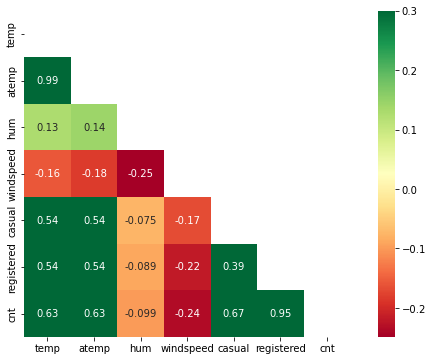

In [27]:
#Plotting HeatMap using above correlation matrix and mask function to remove duplicates.
num_mask = np.zeros_like(num_corr)
num_mask[np.triu_indices_from(num_mask)] = True
plt.figure(figsize=[10,6])
sns.heatmap(num_corr, mask=num_mask, vmax=.3, square=True, annot=True, cmap="RdYlGn")
plt.show()

#For above code referred - https://seaborn.pydata.org/generated/seaborn.heatmap.html and used last plot in the page.

<font color='green'><b><u>Observation:</u></b><br>- From above Correlation Matrix and heatmap we can notice cnt has negative correlation with windspeed <br>- As mentioned earlier strong positive correlation between temp and atemp with value as 0.99.</font>

<b>3.5 Univariate analysis of Categorical variable</b>

In [28]:
def get_normalized_x_y(column):
    normalize_data = column.value_counts(normalize=True) * 100 
    
    categories = normalize_data.index
    counts = normalize_data.values
    
    return categories,counts


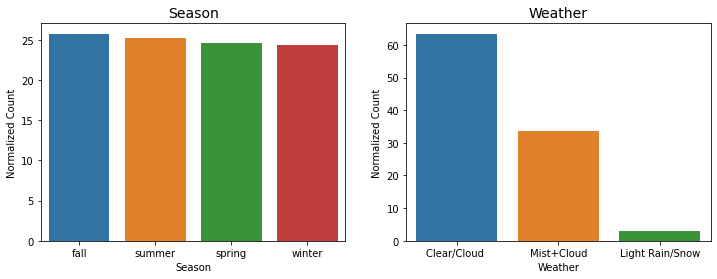

In [29]:
plt.figure(figsize=(12,4))
    
plt.subplot(1, 2, 1)
plt.title('Season', fontsize=14)
s_x,s_y = get_normalized_x_y(df_bike_share['season'])
ax1 = sns.barplot(s_x,s_y)
plt.xlabel('Season')
plt.ylabel('Normalized Count')


plt.subplot(1, 2, 2)
plt.title('Weather', fontsize=14)
wh_x,wh_y = get_normalized_x_y(df_bike_share['weathersit'])
ax1 = sns.barplot(wh_x,wh_y)
plt.xlabel('Weather')
plt.ylabel('Normalized Count')

   
plt.show()


<font color='green'><b><u>Observation:</u></b><br>- We have maximum no of days or data given as Clear/Cloud weather (which represents Clear, Few clouds, Partly cloudy)</font>

<b>3.6 Bivariate analysis of Categorical variable</b>

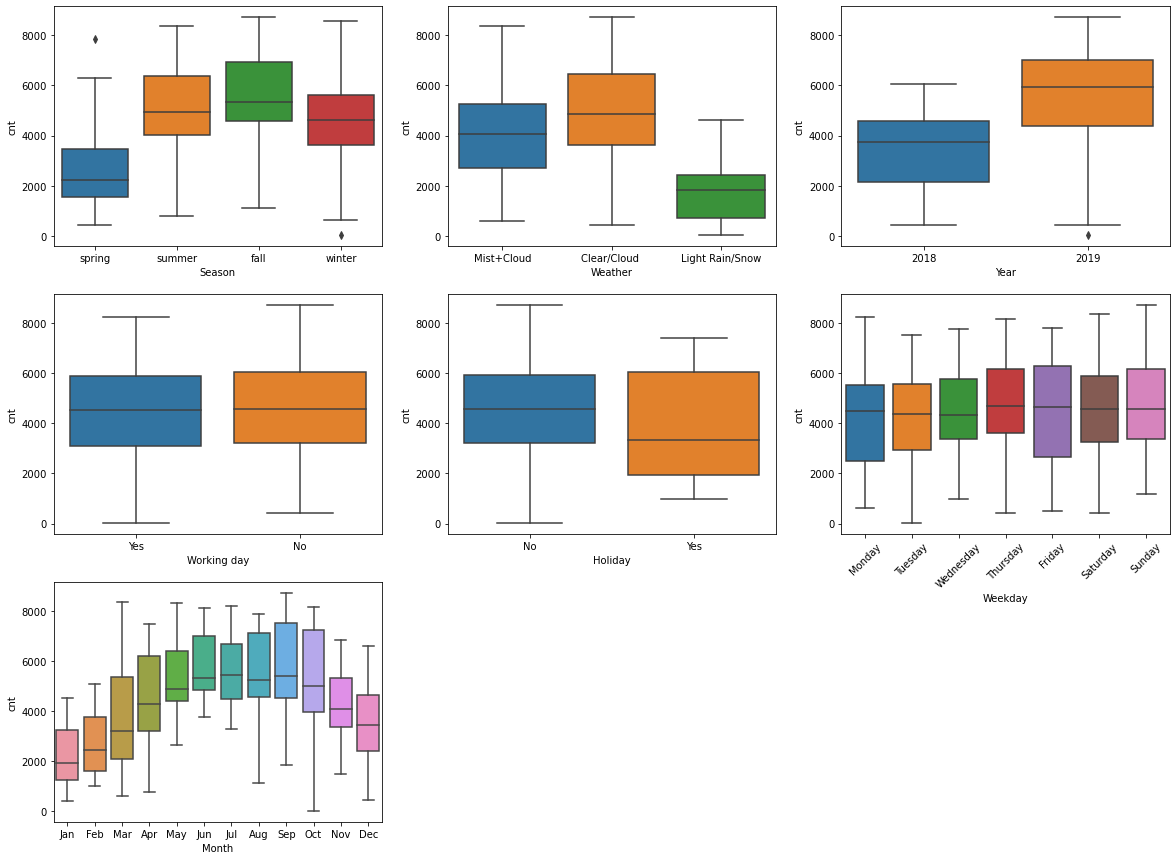

In [30]:
plt.figure(figsize=(20,15))
    
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_share)
plt.xlabel('Season')

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_share)
plt.xlabel('Weather')

plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike_share)
plt.xlabel('Year')

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_share)
plt.xlabel('Working day')

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_share)
plt.xlabel('Holiday')

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_share)
plt.xlabel('Weekday')
plt.xticks(rotation=45)

plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike_share)
plt.xlabel('Month')

plt.show()

<font color='green'><b><u>Observation:</u></b><br>-Season: Fall has the highest median whereas spring has lowest median. Also we can see outliers in spring and winter near upper fence and lower fence respectively. From this we can conclude that bike sharing demand is more in Fall season<br><br>-Weather: Clear/Cloud weather (which represents Clear, Few clouds, Partly cloudy) has highest median and a good demand in bike sharing followed by Mist+Cloud weather (which represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)<br><br>-Year: In 2019 we can see more demand compare to 2018<br><br>-Working Day: Median is same irrepective of working day or not, so we can conclude that bike sharing demand is not affected by whether it is working day or not <br><br>-Holiday: On Holiday median is less than 25% quartile of the non-Holiday.<br><br>-Weekday: All days in week have somewhat similar demand for bike sharing.<br><br>-Month: Jul has the highest mean. Also good demand for bike sharing can be seen in months of May, Jun, Jul, Aug, Sept. Whereas Jan is month with least value for cnt.</font>

<b>3.7 Multivariate analysis of categorical variable</b>

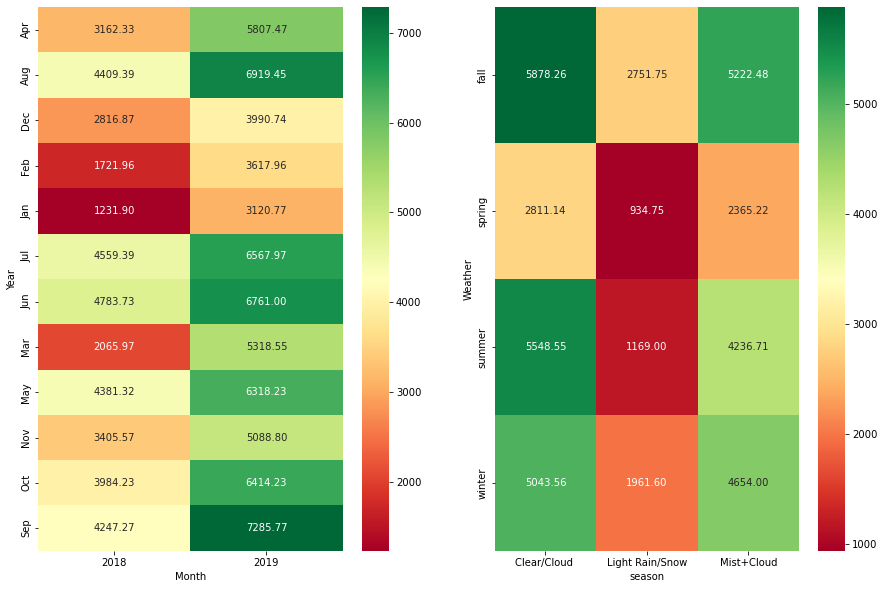

In [31]:

#Ploting heatmap
plt.figure(figsize=[15,10])

#Yr vs mnth vs cnt
plt.subplot(1,2,1)
sns.heatmap(pd.pivot_table(data=df_bike_share,index=['mnth'],columns=['yr'],values='cnt'),annot=True, fmt='0.2f', cmap="RdYlGn")
plt.xlabel('Month')
plt.ylabel('Year')

#Yr vs mnth vs cnt
plt.subplot(1,2,2)
sns.heatmap(pd.pivot_table(data=df_bike_share,index=['season'],columns=['weathersit'],values='cnt'),annot=True, fmt='0.2f', cmap="RdYlGn")
plt.xlabel('season')
plt.ylabel('Weather')

plt.show()

<font color='green'><b><u>Observation:</u></b><br>- We can see highest demand for bike sharing is in the month of Sep for year 2019. And Jan month of 2018 has least demand for bike sharing.<br>- We have maximum demand for bike sharing in fall season with days having weather as Clear/Cloud (which represents Clear, Few clouds, Partly cloudy). </font>

### Insights from EDA
- We noticed temp and atemp both have good positive correlation with cnt and, also have strong correlation of 0.99 with each other.
- Bike Sharing Demand is highest in month of Sep for year 2019 and overall demand is good from month May to Oct.
- We can also observed a significant demant in Fall season compared to other season.
- Also when wheather is Clear or Slightly Cloudy compared to other weather bike sharing demand is good.

## 4. Data Preparation for Model

In [32]:
df_bike_share.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist+Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist+Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear/Cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear/Cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear/Cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b>4.1 Conversion from categorical string to numerical enconding</b>
- We can see that dataset has columns `holiday`,`workingday` with values as 'Yes' or 'No'.
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.
- The variable like `season`, `yr`, `mnt`, `weekday`, `weathersit` has various n levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [33]:
# List of variables to map
categorical_col_1 =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df_bike_share[categorical_col_1] = df_bike_share[categorical_col_1].apply(binary_map)

In [34]:
df_bike_share.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Monday,1,Mist+Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Tuesday,1,Mist+Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Wednesday,1,Clear/Cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Thursday,1,Clear/Cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Friday,1,Clear/Cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


<b>Dummy variables</b>

In [36]:
categorical_variables = df_bike_share.select_dtypes(exclude=['int64','float64'])
categorical_variables.columns

Index(['season', 'yr', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [37]:
#Get the dummy variables for the categorical feature and store result in df_dummy_val dataframe.
df_dummy_val = pd.get_dummies(categorical_variables, drop_first = True)
df_dummy_val.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Add the results to the original dataframe
df_bike_share = pd.concat([df_bike_share, df_dummy_val], axis = 1)

In [39]:
# Now let's see the head of our dataframe.
df_bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
0,spring,2018,Jan,0,Monday,1,Mist+Cloud,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,Jan,0,Tuesday,1,Mist+Cloud,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,Jan,0,Wednesday,1,Clear/Cloud,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,Thursday,1,Clear/Cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,0,Friday,1,Clear/Cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Drop categorical feature as we have created the dummies for it
df_bike_share.drop(categorical_variables.columns, axis = 1, inplace = True)

In [41]:
df_bike_share.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


<b>4.2 : Drop variable with high correlation</b>

- In EDA we observed that variables 'temp' and 'atemp' are strong correlated with each other.'atemp' is the feeling temperature in Celsius.So we can drop atemp
- Cnt variable i.e. target variable derived from casual and registered, so they have good correlation which was observed in EDA.

In [42]:
df_bike_share.drop(['atemp'],axis=1,inplace=True)
df_bike_share.drop(['casual'],axis=1,inplace=True)
df_bike_share.drop(['registered'],axis=1,inplace=True)
df_bike_share.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_bike_share.shape

(730, 29)

In [44]:
df_bike_share.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     730 non-null    int64  
 1   workingday                  730 non-null    int64  
 2   temp                        730 non-null    float64
 3   hum                         730 non-null    float64
 4   windspeed                   730 non-null    float64
 5   cnt                         730 non-null    int64  
 6   season_spring               730 non-null    uint8  
 7   season_summer               730 non-null    uint8  
 8   season_winter               730 non-null    uint8  
 9   yr_2019                     730 non-null    uint8  
 10  mnth_Aug                    730 non-null    uint8  
 11  mnth_Dec                    730 non-null    uint8  
 12  mnth_Feb                    730 non-null    uint8  
 13  mnth_Jan                    730 non

In [46]:
df_bike_share.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

## 5: Splitting the Data into Training and Testing Sets

As the first basic step for regression is performing a train-test split.

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(df_bike_share, train_size = 0.7, random_state = 100)

In [48]:
#Checking train and test data frame
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## 6: Rescaling the Features

Here we can see that except for temp, hum, windspeed, casual, registered and cnt most of the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. 

If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

<b>This time, we will use MinMax scaling.</b>


<b>6.1 Scaling numeric variable.</b>

In [49]:
min_max_scaler = MinMaxScaler()

In [50]:
# Apply scaler() to the continous variables 
num_columns = ['temp', 'hum', 'windspeed','cnt']  # 'num_columns' has the numerical variables except dummy variables

df_train[num_columns] = min_max_scaler.fit_transform(df_train[num_columns])

df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


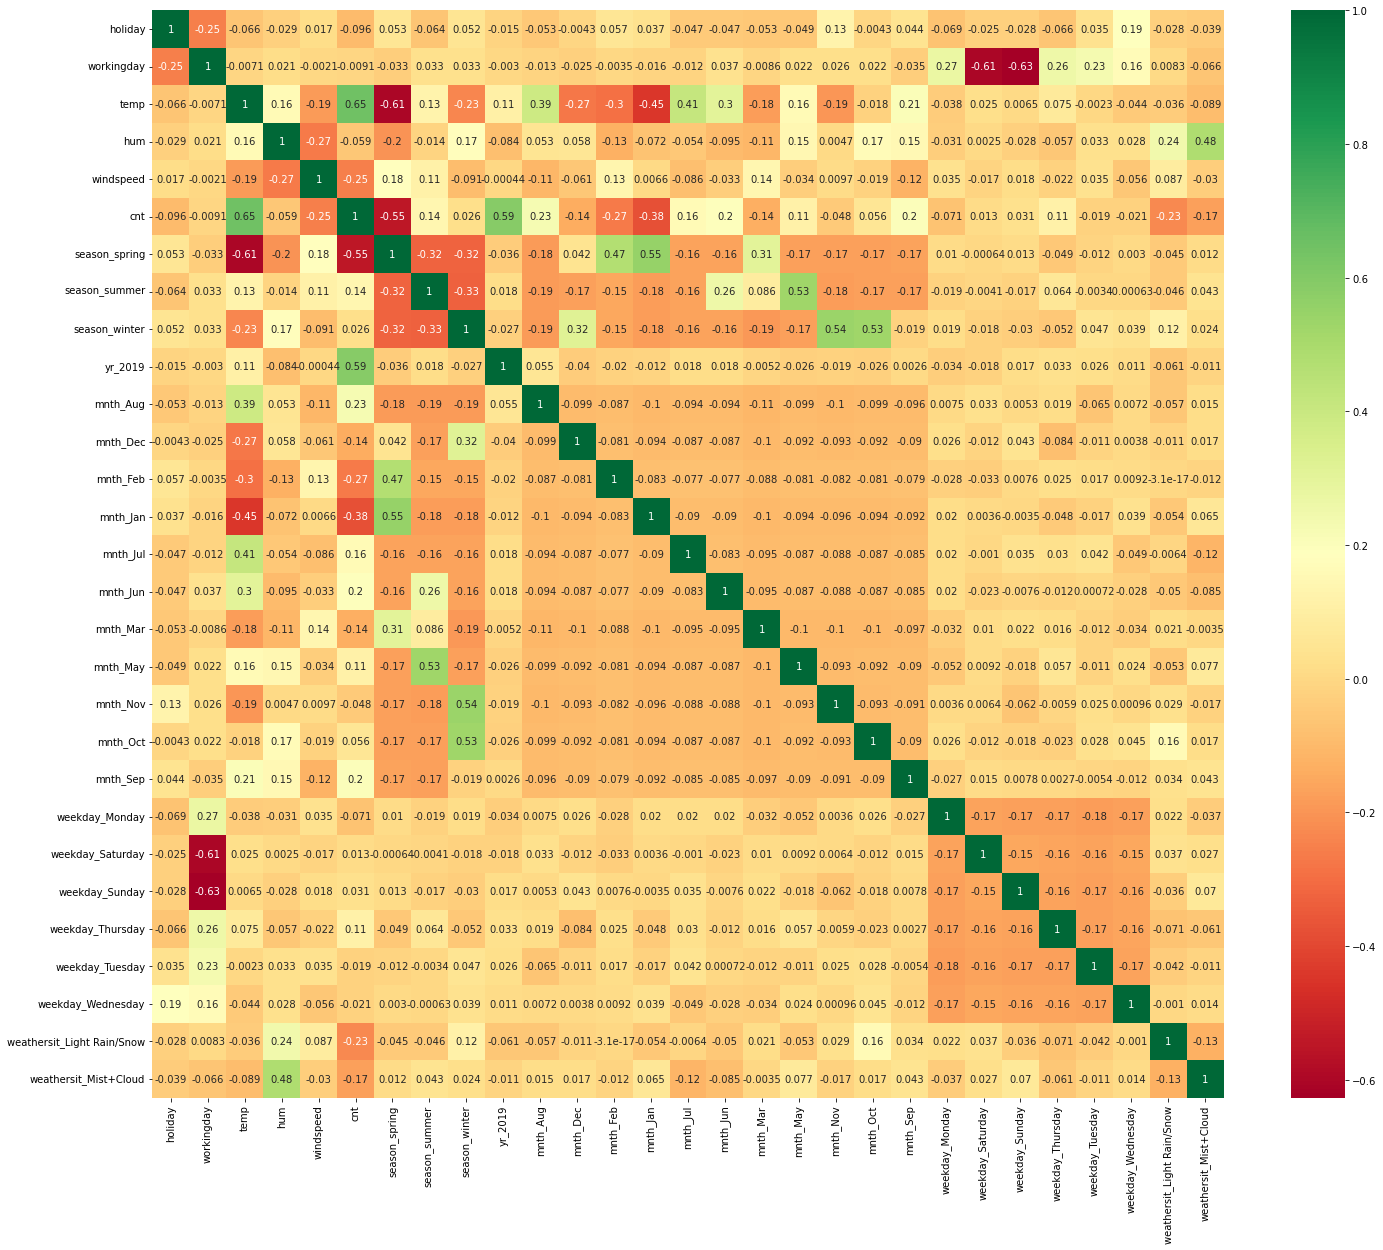

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (24, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

<font color='green'><b><u>Observation:</u></b><br>- Cnt show positive correlation of 0.65 with temp. <br>- Cnt show negative correlation of 0.55 with season_spring.<br>- Working day has negative correlation of 0.61 and 0.63 with weekday_Saturday and weekday_Sunday</font>

<b>6.2 Dividing into X and Y sets for the model building.</b>

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

## 7. Building Linear Regression Model

In [53]:
def build_linear_model(X_train_features,y_train_feature,title):
    print(title)
    print()
    X_train_lm = sm.add_constant(X_train_features)
    lrm = sm.OLS(y_train_feature, X_train_lm).fit()
    print('Coefficients of each feature')
    print()
    print(lrm.params)
    print()
    print('Summary of the model')
    print()
    print(lrm.summary())
    
def cal_vif(X_train_feature):
    vif = pd.DataFrame()
    vif['Features'] = X_train_feature.columns
    vif['VIF'] = [variance_inflation_factor(X_train_feature.values, i) for i in range(X_train_feature.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

<b>7.1 Building Linear Model considering all features.</b>

Here we consider all 28 feature.

In [54]:
#building model 1 with all the feature.
build_linear_model(X_train,y_train,'Model 1 - With all the feature.')

Model 1 - With all the feature.

Coefficients of each feature

const                         0.391163
holiday                      -0.134754
workingday                   -0.060049
temp                          0.440512
hum                          -0.157355
windspeed                    -0.182486
season_spring                -0.040386
season_summer                 0.046443
season_winter                 0.112621
yr_2019                       0.231135
mnth_Aug                      0.027307
mnth_Dec                     -0.044387
mnth_Feb                     -0.037422
mnth_Jan                     -0.064209
mnth_Jul                     -0.028504
mnth_Jun                      0.008393
mnth_Mar                      0.000800
mnth_May                      0.024732
mnth_Nov                     -0.039553
mnth_Oct                      0.005634
mnth_Sep                      0.090823
weekday_Monday               -0.024621
weekday_Saturday             -0.055719
weekday_Sunday               -0.049460
w

<font color='green'><b><u>Observation:</u></b><br>- Here R-Squared and adjusted R-Squared is 1.00 which shows model might overfit.<br>- Also lot of coefficient have very high p-value which show they are insignificant. </font>

<b>7.2 Building Linear Model using RFE .</b>

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [55]:
# Running RFE with the output number of the variable equal to 20. That is selecting 20 features only.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe_20 = RFE(lm, 20)             
rfe_20 = rfe_20.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe_20.support_,rfe_20.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 5),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist+Cloud', True, 1)]

In [57]:
#getting best 20 column/feature
col_20 = X_train.columns[rfe_20.support_]
col_20

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [58]:
#column/feature that were excluded
X_train.columns[~rfe_20.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [59]:
# Creating X_train_rfe_20 dataframe with RFE selected variables
X_train_rfe_20 = X_train[col_20]

In [60]:
#building model 2 with best 20 feature extracted from RFE process built linear model.
build_linear_model(X_train_rfe_20,y_train,'Model 2 - With top 20 feature.')

Model 2 - With top 20 feature.

Coefficients of each feature

const                         0.379997
holiday                      -0.133151
workingday                   -0.055343
temp                          0.462987
hum                          -0.150981
windspeed                    -0.186566
season_spring                -0.051572
season_summer                 0.040132
season_winter                 0.102211
yr_2019                       0.230876
mnth_Dec                     -0.046986
mnth_Feb                     -0.034758
mnth_Jan                     -0.062699
mnth_Jul                     -0.052489
mnth_Nov                     -0.041816
mnth_Sep                      0.073661
weekday_Saturday             -0.042950
weekday_Sunday               -0.037032
weekday_Tuesday              -0.018600
weathersit_Light Rain/Snow   -0.253082
weathersit_Mist+Cloud        -0.057667
dtype: float64

Summary of the model

                            OLS Regression Results                            
De

<font color=green><b><u>Observations</u></b><br>- As for top 20 also we got R-squared and adjusted R-squared close to 0.84 so we can reduce our feature from 28 to 20.<br>- As we have few feature with p-value greater than 0.05 so let us check whether we can reduce further.

Now let us using Model 2 Features (which was built using top 20 features) and try to improve it by eliminating feature having following. Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

In [61]:
#calculating VIF among 20 feature
cal_vif(X_train_rfe_20)

                      Features    VIF
1                   workingday  47.36
3                          hum  38.38
2                         temp  28.58
16              weekday_Sunday   9.58
15            weekday_Saturday   9.20
5                season_spring   7.02
4                    windspeed   5.46
7                season_winter   4.90
6                season_summer   3.54
11                    mnth_Jan   2.54
19       weathersit_Mist+Cloud   2.42
0                      holiday   2.33
8                      yr_2019   2.10
13                    mnth_Nov   2.01
10                    mnth_Feb   1.97
9                     mnth_Dec   1.78
12                    mnth_Jul   1.62
14                    mnth_Sep   1.45
18  weathersit_Light Rain/Snow   1.31
17             weekday_Tuesday   1.29


<font color=green><b><u>Observations</u></b><br>- workingday has high p-value and high vif of 0.434 and 47.36, so we can drop it.</font>

In [62]:
X_train_rfe_20.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [63]:
#dropping workingday
X_train_rfe_19 = X_train_rfe_20.drop(["workingday"], axis = 1)
X_train_rfe_19.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [64]:
#building model 3 with 19 feature i.e post dropping workingday.
build_linear_model(X_train_rfe_19,y_train,'Model 3 - With top 19 feature.')

Model 3 - With top 19 feature.

Coefficients of each feature

const                         0.323825
holiday                      -0.086058
temp                          0.463549
hum                          -0.150095
windspeed                    -0.187102
season_spring                -0.051120
season_summer                 0.040272
season_winter                 0.102205
yr_2019                       0.231282
mnth_Dec                     -0.046690
mnth_Feb                     -0.034386
mnth_Jan                     -0.062467
mnth_Jul                     -0.052518
mnth_Nov                     -0.043444
mnth_Sep                      0.073986
weekday_Saturday              0.011445
weekday_Sunday                0.017308
weekday_Tuesday              -0.018494
weathersit_Light Rain/Snow   -0.252900
weathersit_Mist+Cloud        -0.057517
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R

In [65]:
#calculating VIF among 19 feature
cal_vif(X_train_rfe_19)

                      Features    VIF
2                          hum  31.73
1                         temp  18.60
4                season_spring   5.48
3                    windspeed   4.76
6                season_winter   4.09
5                season_summer   2.83
10                    mnth_Jan   2.38
18       weathersit_Mist+Cloud   2.35
7                      yr_2019   2.10
9                     mnth_Feb   1.92
12                    mnth_Nov   1.87
8                     mnth_Dec   1.69
11                    mnth_Jul   1.61
13                    mnth_Sep   1.41
16             weekday_Tuesday   1.29
17  weathersit_Light Rain/Snow   1.29
15              weekday_Sunday   1.25
14            weekday_Saturday   1.23
0                      holiday   1.06


<font color=green><b><u>Observations</u></b><br>- weekday_Saturday has high pvalue of 0.348.<br>- hum has high vif of 31.73.</font><br>
<b>Dropping weekday_Saturday as it has high p-value. Giving priority to p-value</b>

In [66]:
#dropping weekday_Saturday
X_train_rfe_18 = X_train_rfe_19.drop(["weekday_Saturday"], axis = 1)
X_train_rfe_18.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Sunday', 'weekday_Tuesday',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [67]:
#building model 4 with 18 feature i.e post dropping weekday_Saturday.
build_linear_model(X_train_rfe_18,y_train,'Model 4 - With top 18 feature.') 

Model 4 - With top 18 feature.

Coefficients of each feature

const                         0.325929
holiday                      -0.086585
temp                          0.464846
hum                          -0.151635
windspeed                    -0.187447
season_spring                -0.050474
season_summer                 0.040370
season_winter                 0.102277
yr_2019                       0.231155
mnth_Dec                     -0.046509
mnth_Feb                     -0.034940
mnth_Jan                     -0.062543
mnth_Jul                     -0.052480
mnth_Nov                     -0.043080
mnth_Sep                      0.074228
weekday_Sunday                0.015176
weekday_Tuesday              -0.020510
weathersit_Light Rain/Snow   -0.251771
weathersit_Mist+Cloud        -0.056899
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
M

In [68]:
#calculating VIF among 18 feature
cal_vif(X_train_rfe_18)

                      Features    VIF
2                          hum  31.72
1                         temp  18.42
4                season_spring   5.45
3                    windspeed   4.76
6                season_winter   4.08
5                season_summer   2.82
10                    mnth_Jan   2.38
17       weathersit_Mist+Cloud   2.35
7                      yr_2019   2.10
9                     mnth_Feb   1.92
12                    mnth_Nov   1.87
8                     mnth_Dec   1.68
11                    mnth_Jul   1.61
13                    mnth_Sep   1.41
16  weathersit_Light Rain/Snow   1.29
15             weekday_Tuesday   1.24
14              weekday_Sunday   1.21
0                      holiday   1.06


<font color=green><b><u>Observations</u></b><br>- weekday_Sunday has high pvalue of 0.197.<br>- hum has high vif of 31.73.</font><br>
<b>Dropping weekday_Sunday as it has high p-value</b>

In [69]:
#dropping weekday_Sunday
X_train_rfe_17 = X_train_rfe_18.drop(["weekday_Sunday"], axis = 1)
X_train_rfe_17.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Tuesday',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [70]:
#building model 5 with 17 feature i.e post dropping weekday_Sunday.
build_linear_model(X_train_rfe_17,y_train,'Model 5 - With top 17 feature.')

Model 5 - With top 17 feature.

Coefficients of each feature

const                         0.329346
holiday                      -0.087031
temp                          0.464720
hum                          -0.153921
windspeed                    -0.186702
season_spring                -0.050689
season_summer                 0.040037
season_winter                 0.102250
yr_2019                       0.231319
mnth_Dec                     -0.045766
mnth_Feb                     -0.034817
mnth_Jan                     -0.062758
mnth_Jul                     -0.051587
mnth_Nov                     -0.044064
mnth_Sep                      0.074454
weekday_Tuesday              -0.022953
weathersit_Light Rain/Snow   -0.252281
weathersit_Mist+Cloud        -0.055777
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   

In [71]:
#calculating VIF among 17 feature
cal_vif(X_train_rfe_17)

                      Features    VIF
2                          hum  31.71
1                         temp  18.36
4                season_spring   5.45
3                    windspeed   4.75
6                season_winter   4.08
5                season_summer   2.82
10                    mnth_Jan   2.38
16       weathersit_Mist+Cloud   2.33
7                      yr_2019   2.10
9                     mnth_Feb   1.92
12                    mnth_Nov   1.87
8                     mnth_Dec   1.68
11                    mnth_Jul   1.61
13                    mnth_Sep   1.41
15  weathersit_Light Rain/Snow   1.29
14             weekday_Tuesday   1.20
0                      holiday   1.06


<font color=green><b><u>Observations</u></b><br>- mnth_Feb has high pvalue of 0.108.<br>- hum has high vif of 31.73.</font><br>
<b>Dropping mnth_Feb as it has high p-value</b>

In [72]:
#dropping mnth_Feb
X_train_rfe_16 = X_train_rfe_17.drop(["mnth_Feb"], axis = 1)
X_train_rfe_16.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [73]:
#building model 6 with 16 feature i.e post dropping mnth_Feb.
build_linear_model(X_train_rfe_16,y_train,'Model 6 - With top 16 feature.')

Model 6 - With top 16 feature.

Coefficients of each feature

const                         0.317947
holiday                      -0.089403
temp                          0.480246
hum                          -0.155866
windspeed                    -0.185488
season_spring                -0.060245
season_summer                 0.043271
season_winter                 0.103970
yr_2019                       0.230957
mnth_Dec                     -0.036780
mnth_Jan                     -0.044114
mnth_Jul                     -0.052512
mnth_Nov                     -0.039344
mnth_Sep                      0.075943
weekday_Tuesday              -0.023219
weathersit_Light Rain/Snow   -0.250948
weathersit_Mist+Cloud        -0.055501
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841


In [74]:
#calculating VIF among 16 feature
cal_vif(X_train_rfe_16)

                      Features    VIF
2                          hum  31.08
1                         temp  17.82
3                    windspeed   4.74
4                season_spring   4.37
6                season_winter   4.07
5                season_summer   2.82
15       weathersit_Mist+Cloud   2.33
7                      yr_2019   2.09
11                    mnth_Nov   1.85
9                     mnth_Jan   1.75
10                    mnth_Jul   1.60
8                     mnth_Dec   1.56
12                    mnth_Sep   1.41
14  weathersit_Light Rain/Snow   1.28
13             weekday_Tuesday   1.20
0                      holiday   1.06


<font color=green><b><u>Observations</u></b><br>- By pvalue all feature look significant enough to be part of model.<br>- But hum has high vif of 31.73.</font><br>
<b>Dropping hum as it has ViF</b>

In [75]:
#dropping hum
X_train_rfe_15 = X_train_rfe_16.drop(["hum"], axis = 1)
X_train_rfe_15.columns

Index(['holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [76]:
#building model 7 with 15 feature i.e post dropping hum.
build_linear_model(X_train_rfe_15,y_train,'Model 7 - With top 15 feature.')

Model 7 - With top 15 feature.

Coefficients of each feature

const                         0.246420
holiday                      -0.089792
temp                          0.439199
windspeed                    -0.156101
season_spring                -0.069633
season_summer                 0.036311
season_winter                 0.089939
yr_2019                       0.234912
mnth_Dec                     -0.044002
mnth_Jan                     -0.050523
mnth_Jul                     -0.047109
mnth_Nov                     -0.040220
mnth_Sep                      0.069586
weekday_Tuesday              -0.026904
weathersit_Light Rain/Snow   -0.294872
weathersit_Mist+Cloud        -0.080296
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares  

In [77]:
#calculating VIF among 15 feature
cal_vif(X_train_rfe_15)

                      Features   VIF
1                         temp  5.18
2                    windspeed  4.68
5                season_winter  2.98
3                season_spring  2.90
4                season_summer  2.25
6                      yr_2019  2.08
10                    mnth_Nov  1.81
8                     mnth_Jan  1.66
9                     mnth_Jul  1.60
14       weathersit_Mist+Cloud  1.57
7                     mnth_Dec  1.47
11                    mnth_Sep  1.35
12             weekday_Tuesday  1.20
13  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- By pvalue all feature look significant enough to be part of model.<br>- temp Vif value has dropped significantly to 5.18, from EDA it look significantly correlated with cnt. </font><br>
<b>Dropping temp as it has Vif</b>

In [78]:
#dropping temp
X_train_rfe_14 = X_train_rfe_15.drop(["temp"], axis = 1)
X_train_rfe_14.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [79]:
#building model 8 with 14 feature i.e post dropping temp.
build_linear_model(X_train_rfe_14,y_train,'Model 8 - With top 14 feature.')

Model 8 - With top 14 feature.

Coefficients of each feature

const                         0.597105
holiday                      -0.083573
windspeed                    -0.187954
season_spring                -0.248948
season_summer                -0.048404
season_winter                -0.020203
yr_2019                       0.246180
mnth_Dec                     -0.109866
mnth_Jan                     -0.120737
mnth_Jul                     -0.015335
mnth_Nov                     -0.100216
mnth_Sep                      0.054187
weekday_Tuesday              -0.026138
weathersit_Light Rain/Snow   -0.314759
weathersit_Mist+Cloud        -0.087142
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     135.7

In [80]:
#calculating VIF among 14 feature
cal_vif(X_train_rfe_14)

                      Features   VIF
1                    windspeed  3.91
2                season_spring  2.90
4                season_winter  2.89
3                season_summer  2.04
5                      yr_2019  1.84
9                     mnth_Nov  1.80
7                     mnth_Jan  1.64
13       weathersit_Mist+Cloud  1.53
6                     mnth_Dec  1.46
8                     mnth_Jul  1.21
11             weekday_Tuesday  1.19
10                    mnth_Sep  1.18
12  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- mnth_Jul has pValue so dropping it.</font><br>

In [81]:
#dropping mnth_Jul
X_train_rfe_13 = X_train_rfe_14.drop(["mnth_Jul"], axis = 1)
X_train_rfe_13.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [82]:
#building model 9 with 13 feature i.e post dropping mnth_Jul.
build_linear_model(X_train_rfe_13,y_train,'Model 9 - With top 13 feature.')

Model 9 - With top 13 feature.

Coefficients of each feature

const                         0.591450
holiday                      -0.083254
windspeed                    -0.187788
season_spring                -0.243534
season_summer                -0.042944
season_winter                -0.015349
yr_2019                       0.246259
mnth_Dec                     -0.109419
mnth_Jan                     -0.120741
mnth_Nov                     -0.099572
mnth_Sep                      0.058572
weekday_Tuesday              -0.026780
weathersit_Light Rain/Snow   -0.314916
weathersit_Mist+Cloud        -0.086638
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.3
Date:                Wed, 08 Sep 2021 

In [83]:
#calculating VIF among 13 feature
cal_vif(X_train_rfe_13)

                      Features   VIF
1                    windspeed  3.57
4                season_winter  2.78
2                season_spring  2.71
3                season_summer  1.87
8                     mnth_Nov  1.80
5                      yr_2019  1.78
7                     mnth_Jan  1.64
12       weathersit_Mist+Cloud  1.52
6                     mnth_Dec  1.46
10             weekday_Tuesday  1.18
9                     mnth_Sep  1.16
11  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- season_winter has pValue so dropping it.</font><br>

In [84]:
#dropping season_winter
X_train_rfe_12 = X_train_rfe_13.drop(["season_winter"], axis = 1)
X_train_rfe_12.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'weekday_Tuesday',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [85]:
#building model 10 with 12 feature i.e post dropping season_winter.
build_linear_model(X_train_rfe_12,y_train,'Model 10 - With top 12 feature.')

Model 10 - With top 12 feature.

Coefficients of each feature

const                         0.586962
holiday                      -0.083377
windspeed                    -0.188560
season_spring                -0.237122
season_summer                -0.037790
yr_2019                       0.246388
mnth_Dec                     -0.116941
mnth_Jan                     -0.122027
mnth_Nov                     -0.109701
mnth_Sep                      0.060417
weekday_Tuesday              -0.027478
weathersit_Light Rain/Snow   -0.318233
weathersit_Mist+Cloud        -0.087429
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.65e-1

In [86]:
#calculating VIF among 12 feature
cal_vif(X_train_rfe_12)

                      Features   VIF
1                    windspeed  3.29
2                season_spring  2.37
4                      yr_2019  1.75
3                season_summer  1.71
6                     mnth_Jan  1.62
11       weathersit_Mist+Cloud  1.48
7                     mnth_Nov  1.24
9              weekday_Tuesday  1.17
8                     mnth_Sep  1.16
5                     mnth_Dec  1.13
10  weathersit_Light Rain/Snow  1.07
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- R squared and adjusted R squared is 0.793 and 0.788 respectively. All the feature looks significant based on co-efficient. Also multicollinearity is less.</font><br>

In [87]:
#dropping weekday_Tuesday
X_train_rfe_11 = X_train_rfe_12.drop(["weekday_Tuesday"], axis = 1)
X_train_rfe_11.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [88]:
##building model 11 with 11 feature i.e post dropping mnth_Jul.
build_linear_model(X_train_rfe_11,y_train,'Model 11 - With top 11 feature.')

Model 11 - With top 11 feature.

Coefficients of each feature

const                         0.583404
holiday                      -0.085379
windspeed                    -0.191045
season_spring                -0.236652
season_summer                -0.037378
yr_2019                       0.245937
mnth_Dec                     -0.116552
mnth_Jan                     -0.121590
mnth_Nov                     -0.110131
mnth_Sep                      0.060674
weathersit_Light Rain/Snow   -0.315470
weathersit_Mist+Cloud        -0.087197
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.71e-161
Time:                        22:32:1

In [89]:
#calculating VIF among 11 feature
cal_vif(X_train_rfe_11)

                      Features   VIF
1                    windspeed  3.23
2                season_spring  2.37
4                      yr_2019  1.74
3                season_summer  1.70
6                     mnth_Jan  1.62
10       weathersit_Mist+Cloud  1.48
7                     mnth_Nov  1.23
8                     mnth_Sep  1.16
5                     mnth_Dec  1.13
9   weathersit_Light Rain/Snow  1.07
0                      holiday  1.06


<font color='green'>Now as we can see, the VIFs and p-values both are within an acceptable range.</font>

<b>Using RFE to get best 15 and then build the model</b>

In [90]:
#Running RFE with the output number of the variable equal to 15. That is selecting 15 features only.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe_15 = RFE(lm, 15)             
rfe_15 = rfe_15.fit(X_train, y_train)

In [91]:
list(zip(X_train.columns,rfe_15.support_,rfe_15.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist+Cloud', True, 1)]

In [92]:
#getting best 15 column/feature
col_15 = X_train.columns[rfe_15.support_]
col_15

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [93]:
#column/feature that were excluded from best 15
X_train.columns[~rfe_15.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [94]:
# Creating X_train_rfe_best15 dataframe with RFE selected variables
X_train_rfe_best15 = X_train[col_15]

In [96]:
#building model 12 with best 15 feature extracted from RFE process built linear model.
build_linear_model(X_train_rfe_best15,y_train,'Model 12 - With top 15 feature.')

Model 12 - With top 15 feature.

Coefficients of each feature

const                         0.319667
holiday                      -0.091089
temp                          0.481503
hum                          -0.162213
windspeed                    -0.188726
season_spring                -0.061255
season_summer                 0.042337
season_winter                 0.101921
yr_2019                       0.230404
mnth_Dec                     -0.035461
mnth_Jan                     -0.043411
mnth_Jul                     -0.055250
mnth_Nov                     -0.038701
mnth_Sep                      0.075467
weathersit_Light Rain/Snow   -0.246481
weathersit_Mist+Cloud        -0.054300
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares 

In [97]:
#calculating VIF among 15 feature
cal_vif(X_train_rfe_15)

                      Features   VIF
1                         temp  5.18
2                    windspeed  4.68
5                season_winter  2.98
3                season_spring  2.90
4                season_summer  2.25
6                      yr_2019  2.08
10                    mnth_Nov  1.81
8                     mnth_Jan  1.66
9                     mnth_Jul  1.60
14       weathersit_Mist+Cloud  1.57
7                     mnth_Dec  1.47
11                    mnth_Sep  1.35
12             weekday_Tuesday  1.20
13  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- The feature p-value less that 0.05 so they seem to significant. But hum has high Vif, so dropping it.<br>- But in this model Rsquared and Adjusted R-square have fallen to 0.845 and 0.84 respectively.

In [98]:
#dropping hum
X_train_rfe_best14 = X_train_rfe_best15.drop(["hum"], axis = 1)
X_train_rfe_best14.columns

Index(['holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [100]:
#building model 13 with 14 feature i.e post dropping hum.
build_linear_model(X_train_rfe_best14,y_train,'Model 13 - With best 14 feature of top 15')

Model 13 - With best 14 feature of top 15

Coefficients of each feature

const                         0.245029
holiday                      -0.091776
temp                          0.438717
windspeed                    -0.158482
season_spring                -0.071257
season_summer                 0.034890
season_winter                 0.086883
yr_2019                       0.234455
mnth_Dec                     -0.042806
mnth_Jan                     -0.050008
mnth_Jul                     -0.050046
mnth_Nov                     -0.039513
mnth_Sep                      0.068730
weathersit_Light Rain/Snow   -0.291749
weathersit_Mist+Cloud        -0.080073
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:               

In [101]:
#calculating VIF among 14 feature extract  out of best 15
cal_vif(X_train_rfe_best14)

                      Features   VIF
1                         temp  5.17
2                    windspeed  4.67
5                season_winter  2.95
3                season_spring  2.89
4                season_summer  2.24
6                      yr_2019  2.07
10                    mnth_Nov  1.81
8                     mnth_Jan  1.66
9                     mnth_Jul  1.59
13       weathersit_Mist+Cloud  1.57
7                     mnth_Dec  1.47
11                    mnth_Sep  1.35
12  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


<font color=green><b><u>Observations</u></b><br>- By pvalue all feature look significant enough to be part of model.<br>- temp Vif value has dropped significantly to 5.17, from EDA it look significantly correlated with cnt. </font><br>
<b>Dropping temp as it has Vif</b>

In [102]:
#dropping temp
X_train_rfe_best13 = X_train_rfe_best14.drop(["temp"], axis = 1)
X_train_rfe_best13.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist+Cloud'],
      dtype='object')

In [103]:
##building model 14 with 13 feature i.e post dropping temp.
build_linear_model(X_train_rfe_best13,y_train,'Model 14 - With 13 feature of top 15')

Model 14 - With 13 feature of top 15

Coefficients of each feature

const                         0.595380
holiday                      -0.085507
windspeed                    -0.190233
season_spring                -0.250334
season_summer                -0.049694
season_winter                -0.023054
yr_2019                       0.245724
mnth_Dec                     -0.108634
mnth_Jan                     -0.120162
mnth_Jul                     -0.018222
mnth_Nov                     -0.099464
mnth_Sep                      0.053371
weathersit_Light Rain/Snow   -0.311704
weathersit_Mist+Cloud        -0.086918
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 08 Sep

In [104]:
#calculating VIF among 14 feature
cal_vif(X_train_rfe_best13)

                      Features   VIF
1                    windspeed  3.89
2                season_spring  2.89
4                season_winter  2.85
3                season_summer  2.02
5                      yr_2019  1.83
9                     mnth_Nov  1.80
7                     mnth_Jan  1.64
12       weathersit_Mist+Cloud  1.53
6                     mnth_Dec  1.46
8                     mnth_Jul  1.20
10                    mnth_Sep  1.18
11  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


In [105]:
#dropping mnth_Jul
X_train_rfe_best12 = X_train_rfe_best13.drop(["mnth_Jul"], axis = 1)
X_train_rfe_best12.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [106]:
##building model 15 with 12 feature i.e post dropping mnth_Jul.
build_linear_model(X_train_rfe_best12,y_train,'Model 15 - With top 12 feature.')

Model 15 - With top 12 feature.

Coefficients of each feature

const                         0.588578
holiday                      -0.085184
windspeed                    -0.190102
season_spring                -0.243912
season_summer                -0.043214
season_winter                -0.017343
yr_2019                       0.245805
mnth_Dec                     -0.108063
mnth_Jan                     -0.120149
mnth_Nov                     -0.098674
mnth_Sep                      0.058582
weathersit_Light Rain/Snow   -0.311801
weathersit_Mist+Cloud        -0.086310
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.08e-1

In [107]:
#calculating VIF among 12 feature
cal_vif(X_train_rfe_best12)

                      Features   VIF
1                    windspeed  3.52
4                season_winter  2.75
2                season_spring  2.71
3                season_summer  1.87
8                     mnth_Nov  1.80
5                      yr_2019  1.77
7                     mnth_Jan  1.64
11       weathersit_Mist+Cloud  1.52
6                     mnth_Dec  1.46
9                     mnth_Sep  1.16
10  weathersit_Light Rain/Snow  1.09
0                      holiday  1.06


In [108]:
#dropping season_winter
X_train_rfe_best11 = X_train_rfe_best12.drop(["season_winter"], axis = 1)
X_train_rfe_best11.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [109]:
##building model 16 with 11 feature i.e post dropping mnth_Jul.
build_linear_model(X_train_rfe_best11,y_train,'Model 16 - With 11 features of top 15')

Model 16 - With 11 features of top 15

Coefficients of each feature

const                         0.583404
holiday                      -0.085379
windspeed                    -0.191045
season_spring                -0.236652
season_summer                -0.037378
yr_2019                       0.245937
mnth_Dec                     -0.116552
mnth_Jan                     -0.121590
mnth_Nov                     -0.110131
mnth_Sep                      0.060674
weathersit_Light Rain/Snow   -0.315470
weathersit_Mist+Cloud        -0.087197
dtype: float64

Summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.71e-161
Time:                        2

In [110]:
#calculating VIF among 11 feature
cal_vif(X_train_rfe_best11)

                      Features   VIF
1                    windspeed  3.23
2                season_spring  2.37
4                      yr_2019  1.74
3                season_summer  1.70
6                     mnth_Jan  1.62
10       weathersit_Mist+Cloud  1.48
7                     mnth_Nov  1.23
8                     mnth_Sep  1.16
5                     mnth_Dec  1.13
9   weathersit_Light Rain/Snow  1.07
0                      holiday  1.06


<font color='green'>Now as we can see, the VIFs and p-values both are within an acceptable range.</font>

#### Here we used RFE twice once for Best 20 feature and second time for Best 15 feature
- Comparing the best fit model that we got both time it has same features. Now will build final model using those feature.
- So we go ahead and make our predictions using this model only.

In [111]:
#Features of Model 16 got post reduction in best 20 got from RFE.
X_train_rfe_11.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [112]:
#Features of Model 15 got post reduction in best 15 got from RFE.
X_train_rfe_best11.columns

Index(['holiday', 'windspeed', 'season_spring', 'season_summer', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist+Cloud'],
      dtype='object')

In [113]:
X_train_final_lm = sm.add_constant(X_train_rfe_best11)
final_lrm = sm.OLS(y_train, X_train_final_lm).fit()

In [114]:
final_lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.71e-161
Time:                        22:36:42   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5834      0.013     44.987      0.000       0.558       0.609
holiday                       -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed                     -0.1910      0.029     -6.694      0.000      -0.247      -0.135
season_spring                 -0.2367      0.015    -16.212      0.000      -0.265      -0.208
season_summer                 -0.0374      0.013     -2.937      0.003      -0.062      -0.012
yr_2019                        0.2459      0.009     26.646      0.000       0.228       0.264
mnth_Dec                      -0.1166      0.017     -6.689      0.000      -0.151      -0.082
mnth_Jan                      -0.1216      0.020     -6.143      0.000      -0.160      -0.083
mnth_Nov                      -0.1101      0.018     -6.120      0.000      -0.145      -0.075
mnth_Sep                       0.0607      0.018      3.304      0.001       0.025       0.097
weathersit_Light Rain/Snow    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
weathersit_Mist+Cloud         -0.0872      0.010     -8.883      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_cnt = final_lrm.predict(X_train_final_lm)

Text(0.5, 0, 'Errors')

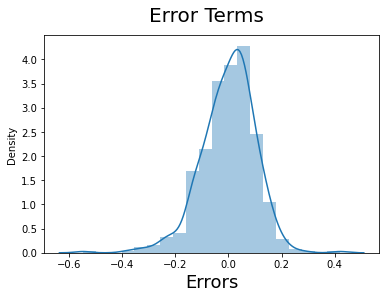

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<font color='green'>The error terms are normally distributed and mean is close to 0</font>

## 9. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

<b>9.1 Applying the scaling on the test sets</b>

In [117]:
num_columns = ['temp', 'hum', 'windspeed','cnt']

df_test[num_columns] = min_max_scaler.transform(df_test[num_columns])

In [118]:
#checking transformation
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist+Cloud
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>9.2 Dividing into X_test and y_test</b>

In [122]:
y_test = df_test.pop('cnt')
X_test = df_test

In [123]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)

In [125]:
X_test_final_lm = X_test_final[X_train_final_lm.columns]

In [126]:
# Making predictions
y_pred = final_lrm.predict(X_test_final_lm)

## 10. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

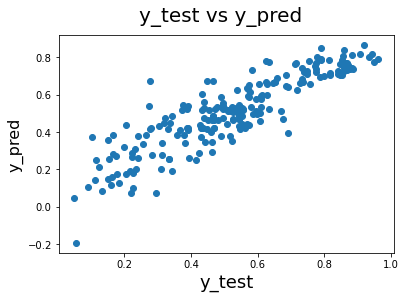

In [127]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [128]:
#Check R2e
r2_score(y_true=y_test,y_pred=y_pred)

0.7790839400465184

<b><font color='green'> So if we compare Training set R2 score (0.791) and Test set R2 score(0.7790) which show model is generalized and good. </font></b>

<b> Model Equation </b>

In [132]:
final_lrm.params

const                         0.583404
holiday                      -0.085379
windspeed                    -0.191045
season_spring                -0.236652
season_summer                -0.037378
yr_2019                       0.245937
mnth_Dec                     -0.116552
mnth_Jan                     -0.121590
mnth_Nov                     -0.110131
mnth_Sep                      0.060674
weathersit_Light Rain/Snow   -0.315470
weathersit_Mist+Cloud        -0.087197
dtype: float64

cnt = 0.583404 - 0.085379 * holiday - 0.191045 * windspeed - 0.236652 * season_spring - 0.037378 * season_summer + 0.245937 * yr_2019 - 0.116552 * mnth_Dec - 0.121590 * mnth_Jan - 0.110131 * mnth_Nov + 0.060674 * mnth_Sep - 0.315470 * weathersit_Light Rain/Snow - 0.087197 * weathersit_Mist+Cloud

Overall we have a decent model, but we also acknowledge that we could do better.